<a href="https://colab.research.google.com/github/superproger228/coursework/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F2_PyTorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
import pandas as pd 
import torch.nn as nn 
from torch.utils.data import random_split, DataLoader, TensorDataset 
import torch.nn.functional as F 
import numpy as np 
import torch.optim as optim 
from torch.optim import Adam
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("iris") #загружаем датасет ирисов
df.head() #вывод первых 5 строк

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['species'].value_counts() #выводим количество уникальных значений в стобце, содержашем тип ириса

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [4]:
labels = {'setosa':0, 'versicolor':1, 'virginica':2}  #создаем словарь 
df['IrisType_num'] = df['species']  #добавляем новый столбец
df.IrisType_num = [labels[item] for item in df.IrisType_num]  #преобразуем тип ириса в число
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,IrisType_num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [5]:
input = df.iloc[:,:-2]                #все столбцы кроме последних 2х
print(input, '\n')   
output = df.loc[:, 'IrisType_num']   
print(output)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns] 

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: IrisType_num, Length: 150, dtype: int64


In [6]:
input = torch.Tensor(input.to_numpy())     
output = torch.tensor(output.to_numpy())        
data = TensorDataset(input, output)        #cоздаем датасет из 2х тензоров

In [7]:
train_batch_size = 10        #количество батчей для тренировочной выборки
number_rows = len(input)     #150 
test_split = int(number_rows*0.2)     #15  30
validate_split = int(number_rows*0.2) #30
train_split = number_rows - test_split - validate_split   #105  90
train_set, validate_set, test_set = random_split( 
    data, [train_split, validate_split, test_split])                                #произвольно разделяем набор данных на непересекающиеся новые наборы данных заданной длины.
 
train_loader = DataLoader(train_set, batch_size = train_batch_size, shuffle = True) #разделяем даныные на пакеты
validate_loader = DataLoader(validate_set, batch_size = 1)                          
test_loader = DataLoader(test_set, batch_size = 1)                                  

In [8]:
test_set[:]

(tensor([[6.5000, 3.0000, 5.2000, 2.0000],
         [4.7000, 3.2000, 1.6000, 0.2000],
         [6.1000, 2.9000, 4.7000, 1.4000],
         [5.2000, 3.4000, 1.4000, 0.2000],
         [6.4000, 2.9000, 4.3000, 1.3000],
         [6.9000, 3.2000, 5.7000, 2.3000],
         [6.7000, 3.1000, 4.4000, 1.4000],
         [7.4000, 2.8000, 6.1000, 1.9000],
         [7.1000, 3.0000, 5.9000, 2.1000],
         [5.0000, 3.4000, 1.6000, 0.4000],
         [6.3000, 3.4000, 5.6000, 2.4000],
         [5.4000, 3.9000, 1.3000, 0.4000],
         [5.0000, 3.5000, 1.3000, 0.3000],
         [6.7000, 3.0000, 5.0000, 1.7000],
         [6.2000, 3.4000, 5.4000, 2.3000],
         [6.2000, 2.2000, 4.5000, 1.5000],
         [4.6000, 3.4000, 1.4000, 0.3000],
         [4.9000, 3.6000, 1.4000, 0.1000],
         [6.3000, 2.7000, 4.9000, 1.8000],
         [5.5000, 2.6000, 4.4000, 1.2000],
         [5.8000, 2.7000, 5.1000, 1.9000],
         [6.3000, 3.3000, 6.0000, 2.5000],
         [5.8000, 2.7000, 4.1000, 1.0000],
         [6

In [33]:
for i, batch in enumerate(test_loader):
 print(i, batch)

0 [tensor([[6.5000, 3.0000, 5.2000, 2.0000]]), tensor([2])]
1 [tensor([[4.7000, 3.2000, 1.6000, 0.2000]]), tensor([0])]
2 [tensor([[6.1000, 2.9000, 4.7000, 1.4000]]), tensor([1])]
3 [tensor([[5.2000, 3.4000, 1.4000, 0.2000]]), tensor([0])]
4 [tensor([[6.4000, 2.9000, 4.3000, 1.3000]]), tensor([1])]
5 [tensor([[6.9000, 3.2000, 5.7000, 2.3000]]), tensor([2])]
6 [tensor([[6.7000, 3.1000, 4.4000, 1.4000]]), tensor([1])]
7 [tensor([[7.4000, 2.8000, 6.1000, 1.9000]]), tensor([2])]
8 [tensor([[7.1000, 3.0000, 5.9000, 2.1000]]), tensor([2])]
9 [tensor([[5.0000, 3.4000, 1.6000, 0.4000]]), tensor([0])]
10 [tensor([[6.3000, 3.4000, 5.6000, 2.4000]]), tensor([2])]
11 [tensor([[5.4000, 3.9000, 1.3000, 0.4000]]), tensor([0])]
12 [tensor([[5.0000, 3.5000, 1.3000, 0.3000]]), tensor([0])]
13 [tensor([[6.7000, 3.0000, 5.0000, 1.7000]]), tensor([1])]
14 [tensor([[6.2000, 3.4000, 5.4000, 2.3000]]), tensor([2])]
15 [tensor([[6.2000, 2.2000, 4.5000, 1.5000]]), tensor([1])]
16 [tensor([[4.6000, 3.4000, 1.400

In [10]:
#len(test_set)
#test_set[:]

In [11]:
input_size = list(input.shape)[1]   #.shape-размеры тензора, получаем значение 4
output_size = len(labels)           #3
N = 32                              #количество параметров

class Network(nn.Module):                          #задаем сеть с 3 линейными слоями
   def __init__(self, input_size, output_size): 
       super(Network, self).__init__() 
        
       self.layer1 = nn.Linear(input_size, N)     
       self.layer2 = nn.Linear(N, N) 
       self.layer3 = nn.Linear(N, output_size) 

   def forward(self, x):                           
       x1 = F.relu(self.layer1(x))           #relu-Rectified Linear Unit: f=max(0;x)
       x2 = F.relu(self.layer2(x1)) 
       x3 = self.layer3(x2) 
       return x3 
 
model = Network(input_size, output_size)

In [12]:
from torchsummary import summary
summary(model, (4,))     #параметры модели

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 32]             160
            Linear-2                   [-1, 32]           1,056
            Linear-3                    [-1, 3]              99
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [13]:
loss_fn = nn.CrossEntropyLoss()                                    #перекрестная энтропия
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=5e-4)  #оптимизатор Адам со скоростью обучения 0,01


In [14]:
from google.colab import drive                 #сохранение параметров модели после обучения в файл на гугл диске
drive.mount('/content/drive')

def saveModel(): 
    torch.save(model.state_dict(), F'/content/drive/MyDrive/Colab Notebooks/checkpoint.txt') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
def train(num_epochs): 
    best_accuracy = 0.0 
    ep_train_loss = []      #создаем массивы для дальнейшего построения графиков
    ep_val_loss = []
    ep_accuracy = []
     
    for epoch in range(1, num_epochs+1): 
        running_train_loss = 0.0 
        running_accuracy = 0.0 
        running_vall_loss = 0.0 
        total = 0 

 
        for data in train_loader: 
            inputs, outputs = data    #передаем входные и выходные данные, data это [input, output]
            optimizer.zero_grad()     #зануление предыдущих значений градиента
            predicted_outputs = model(inputs)   #предсказываем вывод модели
            train_loss = loss_fn(predicted_outputs, outputs)   #считаем потери 
            train_loss.backward()     #вычисление градиента
            optimizer.step()          #обновление параметров
            running_train_loss +=train_loss.item()  
            

        train_loss_value = running_train_loss/len(train_loader) 
        ep_train_loss.append(train_loss_value)
        #валидация
        with torch.no_grad(): 
            model.eval() 
            for data in validate_loader: 
               inputs, outputs = data 
               predicted_outputs = model(inputs)     #предсказываем вывод модели
               val_loss = loss_fn(predicted_outputs, outputs)  #считаем потери      
               _, predicted = torch.max(predicted_outputs, 1)  #torch.max->(values, indices), сохраняем только индексы
               running_vall_loss += val_loss.item()  
               total += outputs.size(0) 
               running_accuracy += (predicted == outputs).sum().item() 
 
        val_loss_value = running_vall_loss/len(validate_loader) 
        ep_val_loss.append(val_loss_value)  

        accuracy = (100 * running_accuracy / total)     
        ep_accuracy.append(accuracy)

        if accuracy > best_accuracy: 
            saveModel()              #сохранение модели
            best_accuracy = accuracy 
         
        print('batch', epoch, 'Training Loss: %.2f' %train_loss_value, 'Validation Loss: %.2f' %val_loss_value, 'Accuracy %d %%' % (accuracy))
    return ep_train_loss, ep_val_loss, ep_accuracy

In [16]:
def plot_train_process(ep_train_loss, ep_val_loss, ep_accuracy):
  fig, axes = plt.subplots(1, 2, figsize=(15,5))

  axes[0].set_title('Loss')
  axes[0].plot(ep_train_loss, label='train')
  axes[0].plot(ep_val_loss, label='validation')
  axes[0].legend()

  axes[1].set_title('Accuracy')
  axes[1].plot(ep_accuracy)

batch 1 Training Loss: 0.37 Validation Loss: 0.33 Accuracy 100 %
batch 2 Training Loss: 0.36 Validation Loss: 0.31 Accuracy 96 %
batch 3 Training Loss: 0.34 Validation Loss: 0.30 Accuracy 100 %
batch 4 Training Loss: 0.34 Validation Loss: 0.30 Accuracy 100 %
batch 5 Training Loss: 0.31 Validation Loss: 0.27 Accuracy 100 %
batch 6 Training Loss: 0.30 Validation Loss: 0.25 Accuracy 100 %
batch 7 Training Loss: 0.29 Validation Loss: 0.25 Accuracy 100 %
batch 8 Training Loss: 0.28 Validation Loss: 0.24 Accuracy 100 %
batch 9 Training Loss: 0.27 Validation Loss: 0.22 Accuracy 100 %
batch 10 Training Loss: 0.26 Validation Loss: 0.21 Accuracy 100 %
batch 11 Training Loss: 0.25 Validation Loss: 0.20 Accuracy 100 %
batch 12 Training Loss: 0.24 Validation Loss: 0.19 Accuracy 100 %
batch 13 Training Loss: 0.23 Validation Loss: 0.18 Accuracy 100 %
batch 14 Training Loss: 0.22 Validation Loss: 0.17 Accuracy 100 %
batch 15 Training Loss: 0.22 Validation Loss: 0.16 Accuracy 100 %
batch 16 Training Lo

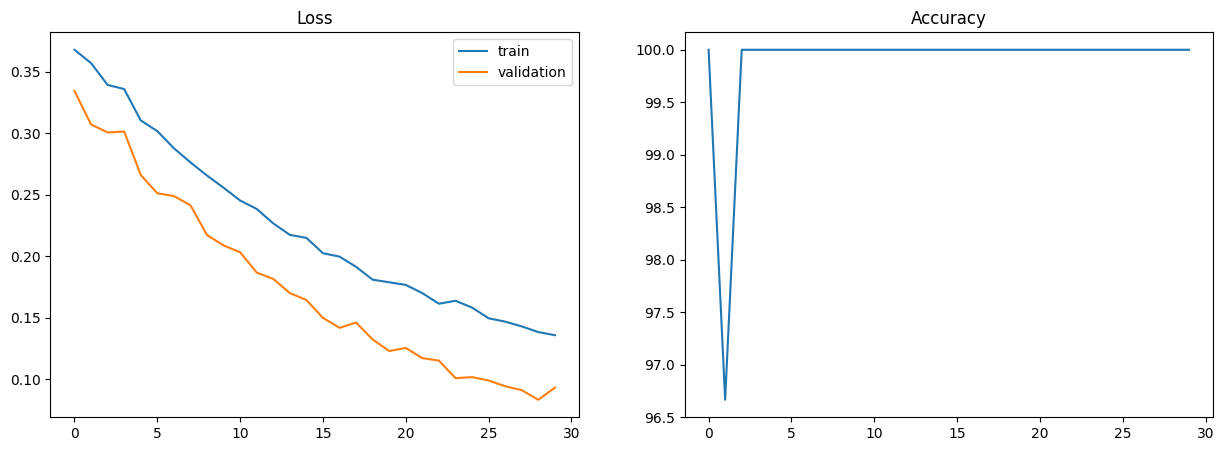

In [35]:
num_epochs = 30
ep_train_loss, ep_val_loss, ep_accuracy = train(num_epochs) 
plot_train_process(ep_train_loss, ep_val_loss, ep_accuracy)

In [27]:
def test(): 
     
    running_accuracy = 0 
    total = 0 
    model.load_state_dict(torch.load(F'/content/drive/MyDrive/Colab Notebooks/checkpoint.txt')) 

    with torch.no_grad(): 
        for data in test_loader: 
            inputs, outputs = data 
            outputs = outputs.to(torch.float32) 
            predicted_outputs = model(inputs) 
            _, predicted = torch.max(predicted_outputs, 1) 
            total += outputs.size(0) 
            running_accuracy += (predicted == outputs).sum().item() 
 
        print('Accuracy: %d %%' % (100 * running_accuracy / total))    
 

In [36]:
test() 

Accuracy: 96 %


In [20]:
#list(model.parameters())  

In [21]:
#model.state_dict() 

In [22]:
#model.state_dict().keys()